# Explore MNIST dataset

MNIST dataset (http://yann.lecun.com/exdb/mnist/) includes 70K handwritten digits (Hello world of machine learning!).<br>
<br>
Each `28*28` image is **flattened** as a 784 **feature vector**. <br>
Each feature represents one pixel's intensity (from 0 to 255).<br>

It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples

In [2]:
import numpy as np

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X, y = mnist["data"], mnist["target"]  # deprecated

shuffle_index = np.random.permutation(X.shape[0])
X =  X[shuffle_index,:]
y = y[shuffle_index]

In [3]:
#from sklearn.datasets import fetch_openml

## Load data from https://www.openml.org/d/554
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home = '../DATASETS') # it takes time! - Downloads everytime!

In [4]:
print(X.shape,y.shape)

(70000, 784) (70000,)


In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
ii = 69999
sample = X[ii]
sample_img = sample.reshape(28, 28)

print(sample_img.min(), sample_img.max())
print(type(sample_img))
print(sample_img.dtype)
plt.show()

0 255
<class 'numpy.ndarray'>
uint8


label: 9.0


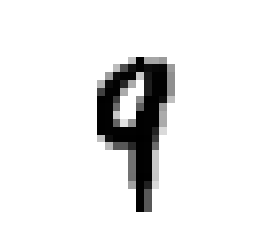

In [7]:
plt.imshow(sample_img, 
           cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

print('label: %s'%y[ii]) # Note that the labels are stored as string!
plt.show()

# Prepare train and test sets

In [8]:
N = 60000

X_train = X[:N]
y_train = y[:N]

X_test = X[N:]
y_test = y[N:]

In [9]:
y_test[:10]

array([8., 9., 9., 3., 8., 1., 5., 0., 6., 8.])

In [10]:
print(np.unique(y_test),type(y_test[0]))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] <class 'numpy.float64'>


Let's convert class names into integer values:

In [35]:
# y_test = int(y_test) # ERROR: only size-1 arrays can be converted to Python scalars


def to_int(x): # scalar
    return int(x)

# ~ 1
y_test = np.array(list(map(to_int,y_test)))

# ~ 2
# to_int_vec = np.vectorize(to_int)
# y_test = to_int_vec(y_test)

In [36]:
print(np.unique(y_test),type(y_test[0]))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.int32'>


In [37]:
y_train = np.array(list(map(to_int,y_train)))

We want to train a 5-detector!

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
y_train_5[1:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False])

# Binary classifier - Perceptron

In [16]:
import time

from sklearn.linear_model import Perceptron

per_clf = Perceptron(tol=1e-3, random_state=0)
# tol, 1e-3: The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol)
# shuffle, True: data is shuffled after each epoch

start_time = time.time()

per_clf.fit(X_train, y_train_5)

print("Elapsed time %.2f seconds." % (time.time() - start_time))

Elapsed time 0.58 seconds.


In [17]:
per_clf.score(X_train,y_train_5)

0.9332166666666667

Seems not bad! 93 percent **accuracy** on the training set!

`score` computes `accuracy` when the estimator is a classifier.

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_5, per_clf.predict(X_train))

0.9332166666666667

In [19]:
# per_clf.get_params(); per_clf.coef_

In [20]:
per_clf.score(X_test,y_test_5)

0.9333

# Dumb classifier!!

In [21]:
from sklearn.base import BaseEstimator

class dumbClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
dumb_clf = dumbClassifier()

dumb_clf.fit(X_train, y_train_5)

accuracy_score(y_train_5, dumb_clf.predict(X_train))

0.90945

90 percent accuracy for the dumb classifier!!

`accuracy` is a common metric to evaluate classifiers. However, it is not good when the dataset is **skewed**/**imbalanced**. In this case, the accuracy is high but the overall performance is low. This is known as **accuracy paradox**.

In [22]:
num_non_5 = np.sum((y_train_5 == False))
N = len(y_train_5)

print('number of non-5 samples:', num_non_5)
print('number of training samples:', N)
print(num_non_5/N)

number of non-5 samples: 54567
number of training samples: 60000
0.90945


In [23]:
accuracy_score(y_test_5, dumb_clf.predict(X_test))

0.912

# Binary classifier - Logistic Regression

In [25]:
import time

from sklearn.linear_model import LogisticRegression

# See here:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Gradient descent is based on the first order derivarive.
log_clf = LogisticRegression(random_state=0, penalty = 'l2', solver = 'lbfgs') # second order derivative
# penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# C, default=1.0 -- Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.

start_time = time.time()

log_clf.fit(X_train, y_train_5)

print("Elapsed time %.2f seconds." % (time.time() - start_time))

Elapsed time 4.70 seconds.


In [26]:
log_clf.score(X_train,y_train_5) 

0.9781333333333333

In [27]:
log_clf.score(X_test,y_test_5)

0.9758

## Prediction for an example

In [31]:
ind_5 = np.where(y == 5)
print(ind_5)

(array([   14,    27,    69, ..., 69974, 69975, 69986], dtype=int64),)


label: 5.0


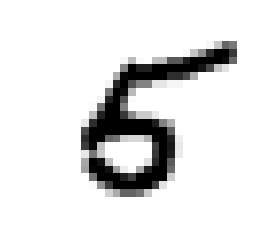

In [32]:
ii = 69974
sample = X[ii]
sample_img = sample.reshape(28, 28)

plt.imshow(sample_img, 
           cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

print('label: %s'%y[ii]) # Note that the labels are stored as string!
plt.show()

In [33]:
print(sample.shape)
sample_vec = np.c_[sample]
print(sample_vec.shape)

print('Predicted label: ',log_clf.predict(sample_vec.T))
print('Probabilities for each class [-,+]:', log_clf.predict_proba(sample_vec.T))

(784,)
(784, 1)
Predicted label:  [ True]
Probabilities for each class [-,+]: [[0.01355969 0.98644031]]


# Binary classifier - SGD Classifier

SGD classifier is one of the mostly used in SKLearn

BIG Data

Supervised problems: (x,y)
- classification
- regression


Unsupervised problems:
- Clustering
- Dimensionality Reduction


In [34]:
import time

from sklearn.linear_model import SGDClassifier

# See here:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

sgd_clf = SGDClassifier(random_state=0, loss = 'log')
# loss, default=’hinge’ = Support Vector Machine
#    The possible options are ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, 
#    ‘perceptron’, or a regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, 
#    or ‘squared_epsilon_insensitive’.
#
# penalty{‘l1’, ‘l2’, ‘elasticnet’}, default=’l2’
# alpha, default=0.0001
# shuffle, default=True
# verbose, default=0

start_time = time.time()

sgd_clf.fit(X_train, y_train_5)

print("Elapsed time %.2f seconds." % (time.time() - start_time))

c:\users\ashkan\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Elapsed time 0.71 seconds.


In [35]:
sgd_clf.score(X_train,y_train_5) 

0.96605

In [36]:
sgd_clf.score(X_test,y_test_5)

0.9649

## Practical tips

See here:<br>
https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use

>Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

model = Pipeline([('scaler', StandardScaler()), 
                  ('sgd_clf', SGDClassifier(random_state=0, loss = 'log',alpha = 0.00001))]) 

In [54]:
start_time = time.time()

model.fit(X_train, y_train_5)

print("Elapsed time %.2f seconds." % (time.time() - start_time))

c:\users\ashkan\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\ashkan\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Elapsed time 1.74 seconds.


In [55]:
model.score(X_train,y_train_5) 

c:\users\ashkan\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9726666666666667

In [56]:
model.score(X_test,y_test_5) 

c:\users\ashkan\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9713

Note on the StandardScalar

> Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

>For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. **If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected**.